In [6]:
import pytorch_lightning as pl
from pytorch_lightning.callbacks import EarlyStopping

from src.cnn import CNN
from src.dataset import CatDogDataset
from src.lit_wrapper import LitWrapper

ds = CatDogDataset(train_workers=1, val_workers=1)
early_stop_callback = EarlyStopping(monitor="val_acc", min_delta=0.00, patience=4, verbose=False, mode="max")
model = LitWrapper(CNN())
trainer = pl.Trainer(max_epochs=2,
                     accelerator='gpu',
                     callbacks=[early_stop_callback],
                     fast_dev_run=True)
trainer.fit(model, train_dataloaders=ds.train_dl, val_dataloaders=ds.val_dl)
preds = trainer.predict(model, dataloaders=ds.val_dl)

GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
Running in `fast_dev_run` mode: will run the requested loop using 1 batch(es). Logging and checkpointing is suppressed.
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name  | Type | Params
-------------------------------
0 | model | CNN  | 1.0 M 
-------------------------------
1.0 M     Trainable params
0         Non-trainable params
1.0 M     Total params
4.160     Total estimated model params size (MB)
C:\Users\johnc\anaconda3\envs\IE4483\lib\site-packages\pytorch_lightning\trainer\connectors\data_connector.py:236: PossibleUserWarning: The dataloader, train_dataloader, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 16 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  rank_zero_warn(
C:\Users\johnc\anaconda3\envs\IE44

Training: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

`Trainer.fit` stopped: `max_steps=1` reached.
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
C:\Users\johnc\anaconda3\envs\IE4483\lib\site-packages\pytorch_lightning\trainer\connectors\data_connector.py:236: PossibleUserWarning: The dataloader, predict_dataloader 0, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 16 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  rank_zero_warn(


Predicting: 1it [00:00, ?it/s]

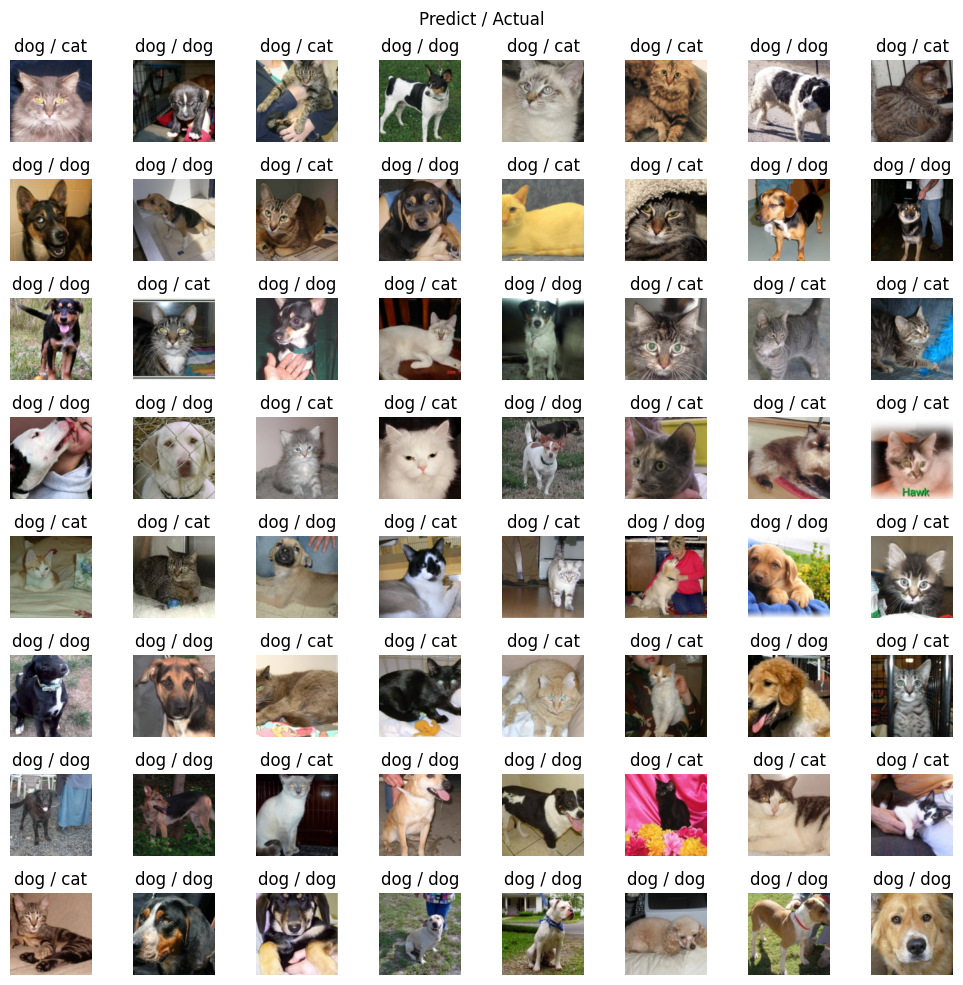

In [7]:
from src.plot import plot_predictions

plot_predictions(preds, ds.val_dl_shuffle)

In [8]:
from src.vgg16 import VGG16

model_pt = LitWrapper(VGG16())
trainer = pl.Trainer(max_epochs=2,
                     accelerator='gpu',
                     callbacks=[early_stop_callback],
                     fast_dev_run=True)
trainer.fit(model, train_dataloaders=ds.train_dl, val_dataloaders=ds.val_dl)
preds = trainer.predict(model, dataloaders=ds.val_dl)

GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
Running in `fast_dev_run` mode: will run the requested loop using 1 batch(es). Logging and checkpointing is suppressed.
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name  | Type | Params
-------------------------------
0 | model | CNN  | 1.0 M 
-------------------------------
1.0 M     Trainable params
0         Non-trainable params
1.0 M     Total params
4.160     Total estimated model params size (MB)


Training: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

`Trainer.fit` stopped: `max_steps=1` reached.
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 1it [00:00, ?it/s]

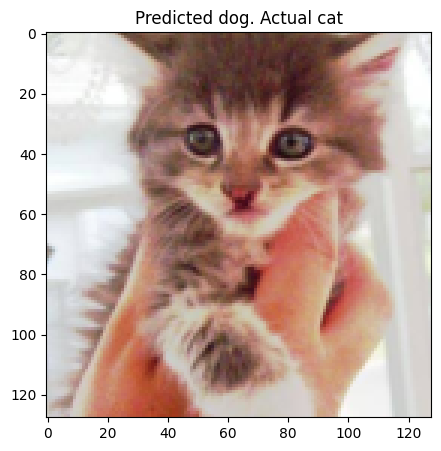

In [4]:
from matplotlib import pyplot as plt
import torch

mapping = {0: 'cat', 1: 'dog'}

for pred_b, val_b in zip(preds, ds.val_dl):
    for pred, val, val_ix in zip(pred_b, val_b[0], val_b[1]):
        val = val.swapaxes(0, -1).swapaxes(0, 1)
        pred_ix = torch.argmax(pred)
        plt.figure(figsize=(5, 5))
        plt.imshow(val)
        plt.title(f"Predicted {mapping[pred_ix.item()]}. Actual {mapping[val_ix.item()]}")
        break
    break

In [9]:
model_pt


LitWrapper(
  (model): VGG16(
    (net): VGG(
      (features): Sequential(
        (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
        (1): ReLU(inplace=True)
        (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
        (3): ReLU(inplace=True)
        (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
        (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
        (6): ReLU(inplace=True)
        (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
        (8): ReLU(inplace=True)
        (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
        (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
        (11): ReLU(inplace=True)
        (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
        (13): ReLU(inplace=True)
        (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), paddin